In [38]:
import random
import matplotlib.pyplot as plt
import numpy as np
from main import disk_size, head, direction, random_request
from algorithm.scan import SCAN
from algorithm.cscan import CSCAN
from algorithm.clook import CLOOK

In [39]:
# Store averages
avg_seek_time_SCAN = []  
avg_seek_time_CSCAN = [] 
avg_seek_time_CLOOK = []

# Store worst case
worst_seek_time_SCAN = []  
worst_seek_time_CSCAN = [] 
worst_seek_time_CLOOK = []






for size in random_request:
    # Generate 'size' random requests
    arr = [random.randint(0, disk_size-1) for _ in range(size)]

    print(f"\nRunning SCAN algorithm for {size} requests:")
    scan_avg, scan_worst = SCAN(disk_size, arr, head, direction)

    # Store all average in avg_seek_time_SCAN
    avg_seek_time_SCAN.append(scan_avg)
    # Store all worst seek time in worst_seek_time_SCAN
    worst_seek_time_SCAN.append(scan_worst)

    

    print(f"\nRunning C-SCAN algorithm for {size} requests:")
    cscan_avg, cscan_worst = CSCAN(disk_size, arr, head)

     # Store all average in avg_seek_time_CSCAN
    avg_seek_time_CSCAN.append(cscan_avg)
    # Store all worst seek time in worst_seek_time_SCAN
    worst_seek_time_CSCAN.append(cscan_worst)



    print(f"\nRunning C-LOOK algorithm for {size} requests:")
    clook_avg, clook_worst = CLOOK(arr, head)

    # Store all average in avg_seek_time_CLOOK
    avg_seek_time_CLOOK.append(clook_avg)
    # Store all worst seek time in worst_seek_time_SCAN
    worst_seek_time_CLOOK.append(clook_worst)



Running SCAN algorithm for 10 requests:
Total number of seek operations = 224
Average seek time = 20.363636363636363
Worst-case seek time = 57
Seek Sequence is
43
34
1
0
57
67
122
124
141
145
174

Running C-SCAN algorithm for 10 requests:
Total number of seek operations = 391
Average seek time = 32.583333333333336
Worst-case seek time = 199
Seek Sequence is
57
67
122
124
141
145
174
199
0
1
34
43

Running C-LOOK algorithm for 10 requests:
Total number of seek operations = 339
Average seek time = 33.9
Worst-case seek time = 173
Seek Sequence is
57
67
122
124
141
145
174
1
34
43

Running SCAN algorithm for 20 requests:
Total number of seek operations = 236
Average seek time = 11.238095238095237
Worst-case seek time = 63
Seek Sequence is
40
34
33
12
9
1
0
63
65
65
83
91
95
123
125
143
146
153
162
183
186

Running C-SCAN algorithm for 20 requests:
Total number of seek operations = 388
Average seek time = 17.636363636363637
Worst-case seek time = 199
Seek Sequence is
63
65
65
83
91
95
123


In [40]:
print("Average Seek Time\n")
print("SCAN   ", avg_seek_time_SCAN)
print("CSCAN  ", avg_seek_time_CSCAN)
print("CLOOK  ", avg_seek_time_CLOOK)

print("\nWorst Seek Time\n")
print("SCAN   ", worst_seek_time_SCAN)
print("CSCAN  ", worst_seek_time_CSCAN)
print("CLOOK  ", worst_seek_time_CLOOK)


Average Seek Time

SCAN    [20.363636363636363, 11.238095238095237, 4.862745098039215, 2.48]
CSCAN   [32.583333333333336, 17.636363636363637, 7.326923076923077, 3.9306930693069306]
CLOOK   [33.9, 18.0, 7.58, 3.8484848484848486]

Worst Seek Time

SCAN    [57, 63, 60, 53]
CSCAN   [199, 199, 199, 199]
CLOOK   [173, 185, 198, 191]


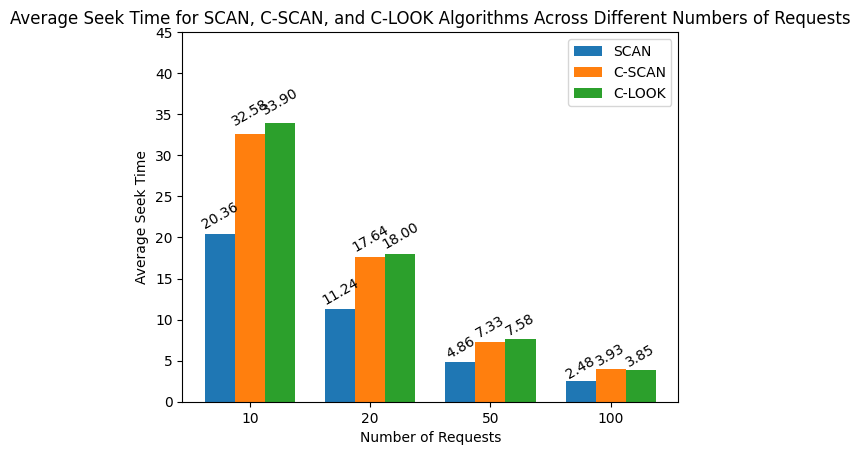

In [41]:
# Set up the bar chart
labels = ['10', '20', '50', '100']
x = np.arange(len(labels))  # the label locations
width = 0.25  # the width of bars


fig, ax = plt.subplots()
rects1 = ax.bar(x - width, avg_seek_time_SCAN, width, label='SCAN')
rects2 = ax.bar(x, avg_seek_time_CSCAN, width, label='C-SCAN')
rects3 = ax.bar(x + width, avg_seek_time_CLOOK, width, label='C-LOOK')


# Labelling
ax.set_xlabel('Number of Requests')
ax.set_ylabel('Average Seek Time')
ax.set_title('Average Seek Time for SCAN, C-SCAN, and C-LOOK Algorithms Across Different Numbers of Requests')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()


# Set the y-axis limit
ax.set_ylim(0, 45)


# Function to add label on bar chart
# Function to add label on bar chart
def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width() / 2., 1.02*height,
                '%.2f' % float(height),
                ha='center', va='bottom', rotation=30)

# Call function to add label
autolabel(rects1)
autolabel(rects2)
autolabel(rects3)


plt.show()

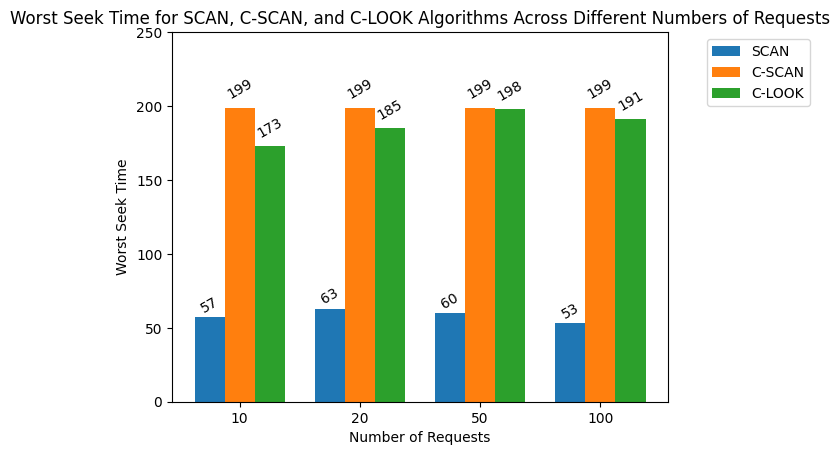

In [42]:
# Set up the bar chart
labels = ['10', '20', '50', '100']
x = np.arange(len(labels))  # the label locations
width = 0.25  # the width of bars


fig, ax = plt.subplots()
rects1 = ax.bar(x - width, worst_seek_time_SCAN, width, label='SCAN')
rects2 = ax.bar(x, worst_seek_time_CSCAN, width, label='C-SCAN')
rects3 = ax.bar(x + width, worst_seek_time_CLOOK, width, label='C-LOOK')


# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_xlabel('Number of Requests')
ax.set_ylabel('Worst Seek Time')
ax.set_title('Worst Seek Time for SCAN, C-SCAN, and C-LOOK Algorithms Across Different Numbers of Requests')
ax.set_xticks(x)
ax.set_xticklabels(labels)


# Legend placement
ax.legend(loc='upper right', bbox_to_anchor=(1.3, 1))


# Set the y-axis limit
ax.set_ylim(0, 250)

def autolabel2(rects):
    for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width() / 2., 1.02*height,
                '%.f' % int(height),
                ha='center', va='bottom', rotation=30)


# Call function to add label
autolabel2(rects1)
autolabel2(rects2)
autolabel2(rects3)


plt.show()